In [1]:
from src.utils import *
import pandas as pd

/home/simin/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = getting_device()

train_df =pd.read_csv('data/train_24892.csv')
test_df = pd.read_csv('data/test_13786.csv')
print(train_df.shape, test_df.shape)

device: cuda
(24892, 4) (13786, 4)


## Experiment 2:

In [3]:
all_tasks = train_df['task'].value_counts().nlargest(50).index.tolist()
all_langs = train_df['language'].value_counts().nlargest(50).index.tolist()
# num_task = [i for i in range (10,51,10)]
num_task = [5, 10, 20, 30, 40, 50]
num_task

[5, 10, 20, 30, 40, 50]

In [4]:
train_df =pd.read_csv('data/train_24892.csv')
test_df = pd.read_csv('data/test_13786.csv')
print(train_df.shape, test_df.shape)

(24892, 4) (13786, 4)


In [5]:
chosen_dic = dict.fromkeys(num_task)
for num in num_task:
    chosen_dic[num] = {'chosen_lang':[], 'chosen_task':[]}

In [6]:
import random
from src.prediction import part_data_analysis
import pickle

for i in num_task:
    for j in range(10):
        chosen_task = random.choices(all_tasks, k = i)
        chosen_lang = random.choices(all_langs, k = i)
        # print(f"Tasks:{chosen_task}")
        # print(f"Languages:{chosen_lang}")
        chosen_dic[i]['chosen_lang'].append(chosen_lang)
        chosen_dic[i]['chosen_task'].append(chosen_task)

        results = part_data_analysis(chosen_task, chosen_lang, train_df, test_df)
        print(results)
        print('========================================================')

Model: bert; Classifier: KNN
--------------------------------------------------------
Model: gpt; Classifier: KNN
--------------------------------------------------------
Model: roberta; Classifier: KNN
--------------------------------------------------------
Model: falcon7b; Classifier: KNN
--------------------------------------------------------
Model: falcon11b; Classifier: KNN
--------------------------------------------------------
Model: falcon40b; Classifier: KNN
--------------------------------------------------------
Model: llama7b; Classifier: KNN
--------------------------------------------------------
Model: llama8b; Classifier: KNN
--------------------------------------------------------
Model: llama13b; Classifier: KNN
--------------------------------------------------------
Model: llama70b; Classifier: KNN
--------------------------------------------------------
Model: embedding_ada; Classifier: KNN
--------------------------------------------------------
Model: embeddin

In [14]:
import pandas as pd

pd_5 = pd.read_pickle(r'out/experiment2/5.pkl')
pd_10 = pd.read_pickle(r'out/experiment2/10.pkl')
pd_20 = pd.read_pickle(r'out/experiment2/20.pkl')
pd_30 = pd.read_pickle(r'out/experiment2/30.pkl')
pd_40 = pd.read_pickle(r'out/experiment2/40.pkl')
pd_50 = pd.read_pickle(r'out/experiment2/50.pkl')

In [26]:
model_names = ['bert', 'gpt', 'roberta', 'falcon7b', 'falcon11b',  'falcon40b', 'llama7b', 'llama8b', 'llama13b', 'llama70b','embedding_ada', 'embedding_small', 'embedding_large', 'codebert', 'codegpt', 'code7b', 'code13b', 'code34b', 'code70b']
results_dic_knn = dict.fromkeys(model_names)
results_dic_svm = dict.fromkeys(model_names)
for m in model_names:
    results_dic_knn[m] = {'pl_acc':[], 'pt_acc':[]}
    results_dic_svm[m] = {'pl_acc':[], 'pt_acc':[]}

In [27]:
results_dic_knn

{'bert': {'pl_acc': [], 'pt_acc': []},
 'gpt': {'pl_acc': [], 'pt_acc': []},
 'roberta': {'pl_acc': [], 'pt_acc': []},
 'falcon7b': {'pl_acc': [], 'pt_acc': []},
 'falcon11b': {'pl_acc': [], 'pt_acc': []},
 'falcon40b': {'pl_acc': [], 'pt_acc': []},
 'llama7b': {'pl_acc': [], 'pt_acc': []},
 'llama8b': {'pl_acc': [], 'pt_acc': []},
 'llama13b': {'pl_acc': [], 'pt_acc': []},
 'llama70b': {'pl_acc': [], 'pt_acc': []},
 'embedding_ada': {'pl_acc': [], 'pt_acc': []},
 'embedding_small': {'pl_acc': [], 'pt_acc': []},
 'embedding_large': {'pl_acc': [], 'pt_acc': []},
 'codebert': {'pl_acc': [], 'pt_acc': []},
 'codegpt': {'pl_acc': [], 'pt_acc': []},
 'code7b': {'pl_acc': [], 'pt_acc': []},
 'code13b': {'pl_acc': [], 'pt_acc': []},
 'code34b': {'pl_acc': [], 'pt_acc': []},
 'code70b': {'pl_acc': [], 'pt_acc': []}}

In [28]:
for i in range(0, 10):
    for model in model_names: 
        results_dic_knn[model]['pl_acc'].append(pd_5[i][model]['KNN']['lang'])
        results_dic_knn[model]['pt_acc'].append(pd_5[i][model]['KNN']['task'])
        results_dic_svm[model]['pl_acc'].append(pd_5[i][model]['SVM']['lang'])
        results_dic_svm[model]['pt_acc'].append(pd_5[i][model]['SVM']['task'])
    

In [43]:
for i in range(0, 10):
    for model in model_names: 
        results_dic_knn[model]['pl_acc'].append(pd_50[i][model]['KNN']['lang'])
        results_dic_knn[model]['pt_acc'].append(pd_50[i][model]['KNN']['task'])
        results_dic_svm[model]['pl_acc'].append(pd_50[i][model]['SVM']['lang'])
        results_dic_svm[model]['pt_acc'].append(pd_50[i][model]['SVM']['task'])

In [ ]:
results_dic_knn

## Analysis


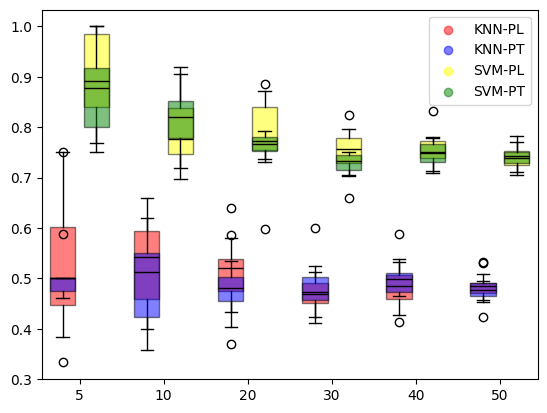

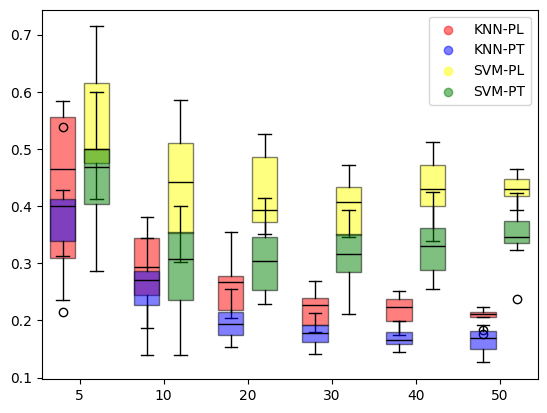

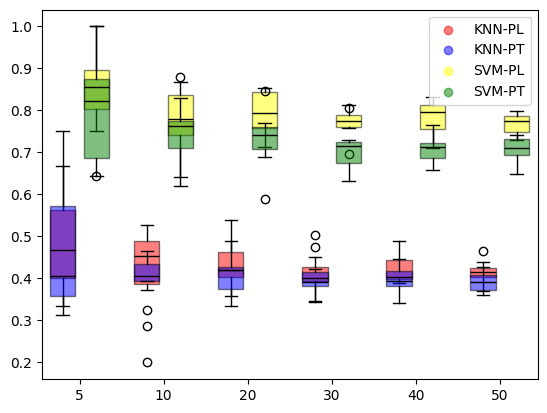

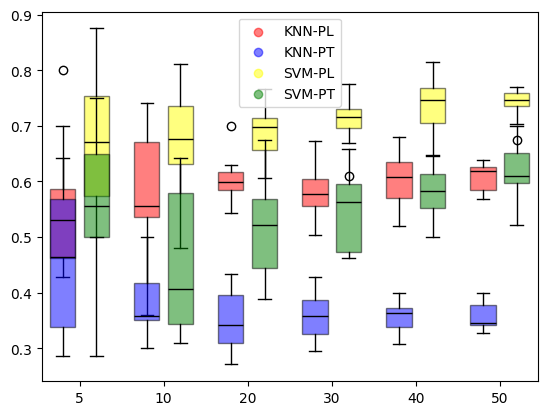

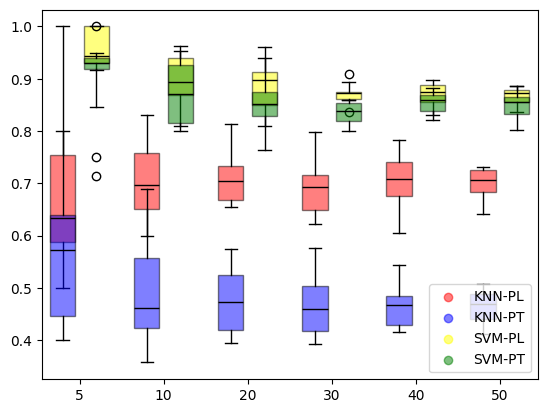

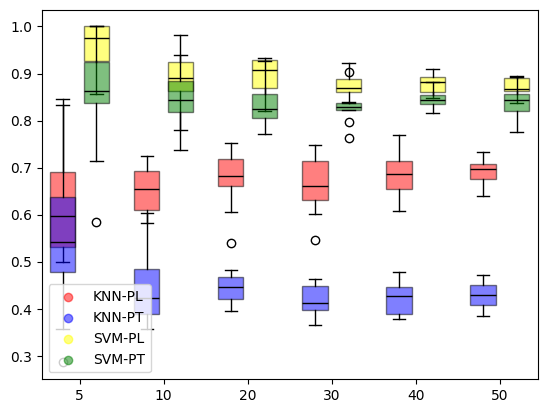

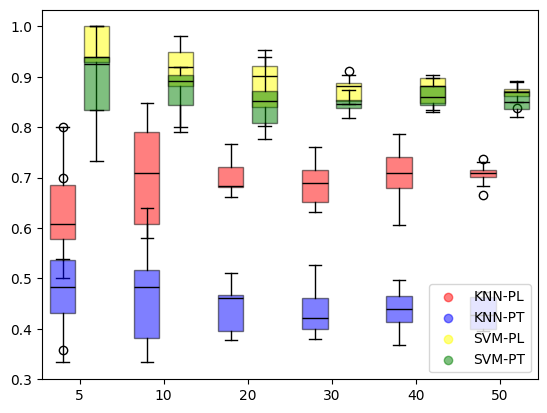

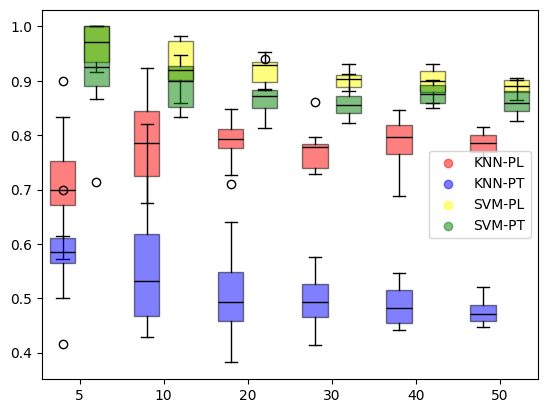

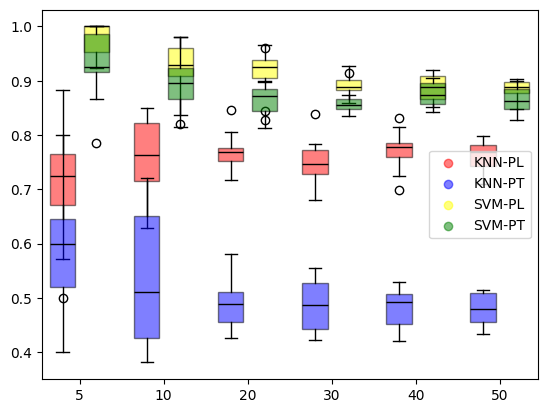

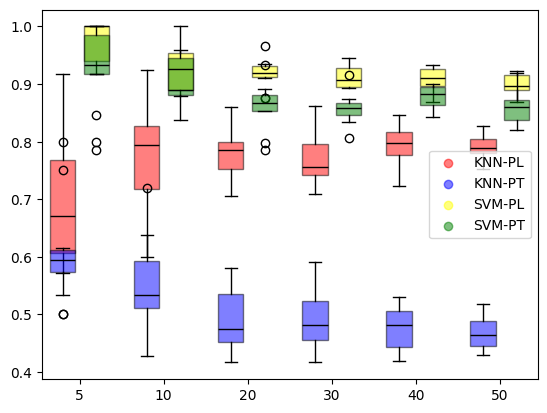

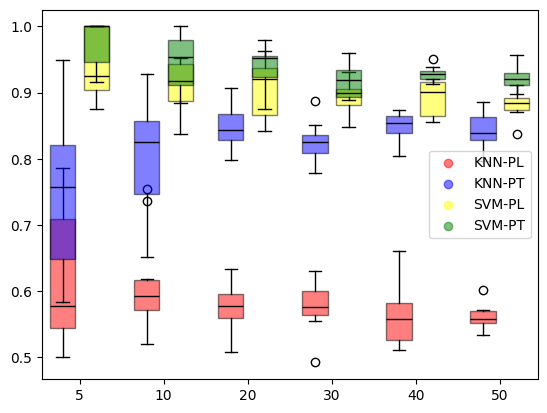

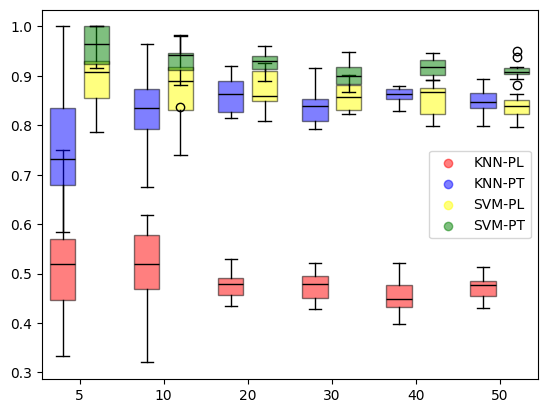

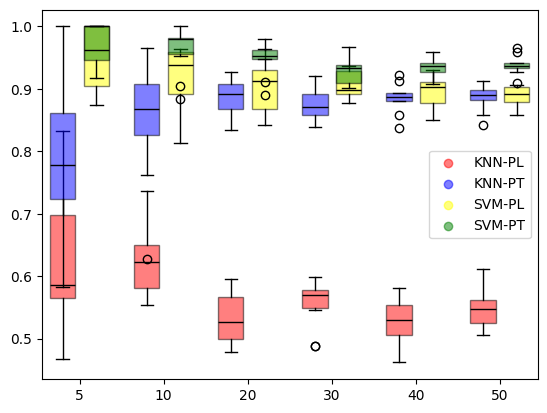

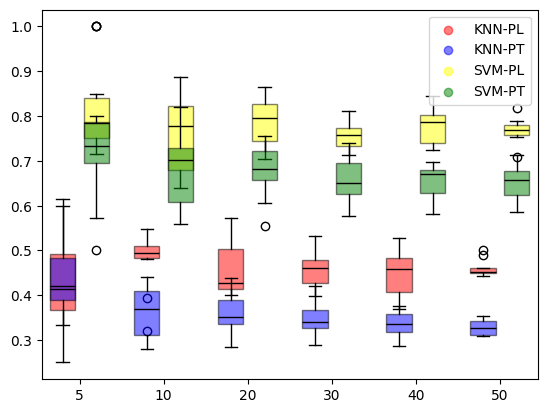

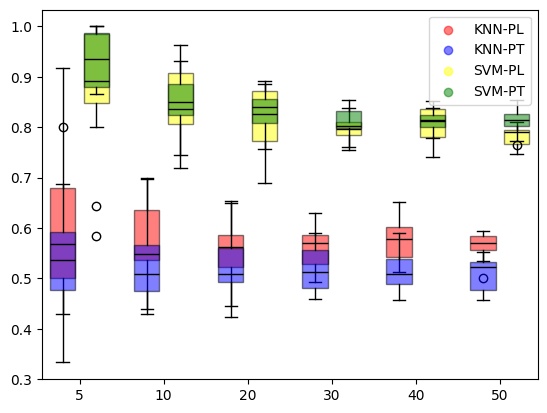

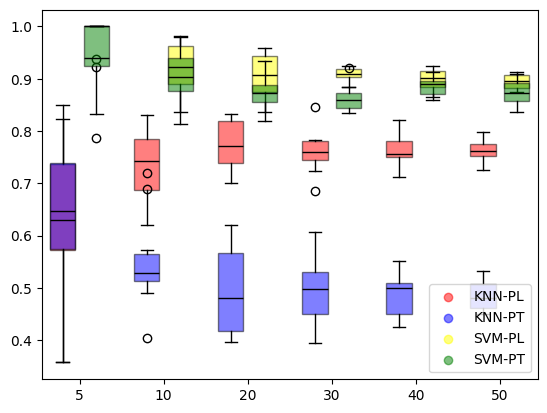

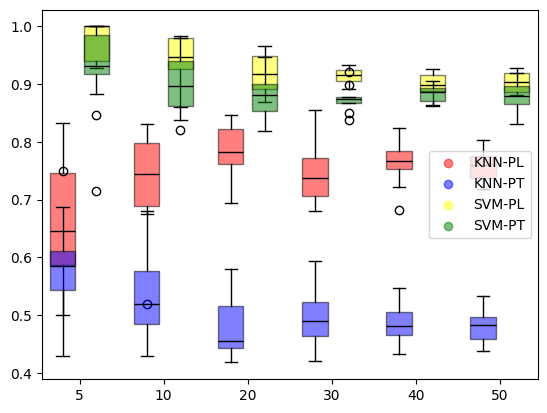

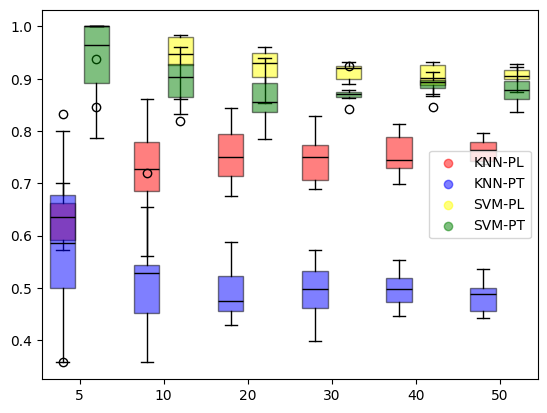

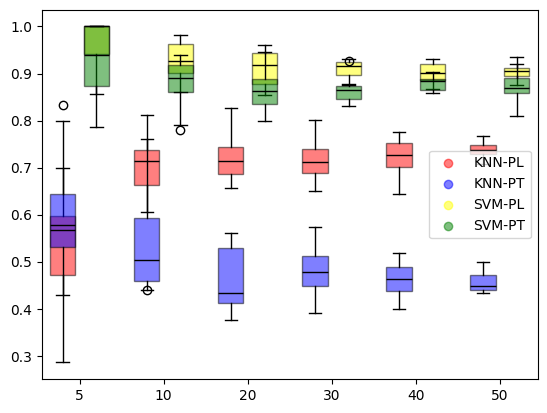

In [61]:
import matplotlib.pyplot as plt
import numpy as np

def chunks(xs, n):
    n = max(1, n)
    return (xs[i:i+n] for i in range(0, len(xs), n))

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

def plot_box(acc_pl_knn, acc_pt_knn, acc_pl_svm, acc_pt_svm, num_task, model):
    plt.figure()
    plt.boxplot(acc_pl_knn, positions=np.array(range(len(acc_pl_knn)))*2.0-0.4, widths=0.6, patch_artist=True, boxprops=dict(facecolor="red", alpha=0.5), medianprops=dict(color="black"))
    plt.boxplot(acc_pt_knn, positions=np.array(range(len(acc_pl_knn)))*2.0-0.4, widths=0.6, patch_artist=True, boxprops=dict(facecolor="blue", alpha=0.5), medianprops=dict(color="black"))
    
    plt.boxplot(acc_pl_svm, positions=np.array(range(len(acc_pl_svm)))*2.0+0.4, widths=0.6, patch_artist=True, boxprops=dict(facecolor="yellow", alpha=0.5), medianprops=dict(color="black"))
    plt.boxplot(acc_pt_svm, positions=np.array(range(len(acc_pl_svm)))*2.0+0.4, widths=0.6, patch_artist=True, boxprops=dict(facecolor="green", alpha=0.5), medianprops=dict(color="black"))
    
    plt.scatter([], [], color="red", alpha=0.5, label="KNN-PL")
    plt.scatter([], [], color="blue", alpha=0.5, label="KNN-PT")
    plt.scatter([], [], color="yellow", alpha=0.5, label="SVM-PL")
    plt.scatter([], [], color="green", alpha=0.5, label="SVM-PT")
    plt.legend()
    
    # plt.xlabel("Number of Tasks/Languages")
    # plt.ylabel("Accuracy")
    # plt.title(model.upper(), y=-0.2)

    plt.xticks(range(0, 12, 2), num_task)
    plt.savefig('image/box/'+model + '.png')

for model in model_names:
    acc_pl_knn = results_dic_knn[model]['pl_acc']
    acc_pl_knn = list(chunks(acc_pl_knn, 10))
    acc_pt_knn = results_dic_knn[model]['pt_acc']
    acc_pt_knn = list(chunks(acc_pt_knn, 10))

    acc_pl_svm = results_dic_svm[model]['pl_acc']
    acc_pl_svm = list(chunks(acc_pl_svm, 10))
    acc_pt_svm = results_dic_svm[model]['pt_acc']
    acc_pt_svm = list(chunks(acc_pt_svm, 10))

    plot_box(acc_pl_knn, acc_pt_knn, acc_pl_svm, acc_pt_svm, num_task, model)